# Part I - (Ford GoBike System Data Exploration)
## by (Naod Mergiya)

## Introduction
> Introduce the dataset

## Data gathering

The data was downloaded from this source https://s3.amazonaws.com/baywheels-data/index.html where it is available in a single file compiled for the year 2019




## Preliminary Wrangling


In [24]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from geopy import distance
%matplotlib inline

In [27]:
# To simplifies the calculation of geographic distances between two points
! pip install geopy

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [9]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [12]:
df.shape

(183412, 16)

The datsset contains records of 183412 trips, basic deatils(16 columns) of the trip and what type of a user took the ride, when, where did they start and end the trip etc

In [13]:
#create copy of dataset
df=df.copy()

#save df.copy as bike_df
bike_df=df.copy()

### What is the structure of your dataset?

> The datsset contains records of 183412 trips, basic deatils(16 columns) of the trip and what type of a user took the ride, when, where did they start and end the trip etc
 

### What is/are the main feature(s) of interest in your dataset?

 1. When are most trips taken in terms of time of day, day of the week, or month of the year?
  2. How long does the average trip take?
  3. What is the average distance travelled?
  4. Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  start_time, duration_sec, user_type, latitude and longitude columns

## Data Wranglng

In [14]:
#convert dtype of 'start_time' to datetime object
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])

In [15]:
#split start_time into 'date' and 'ttime' columns
bike_df['start_ttime'] = bike_df['start_time'].dt.strftime('%H:%M')
bike_df['start_date'] = bike_df['start_time'].dt.strftime('%Y-%m-%d')

#extract 'hour' from start_time column
bike_df['start_hour'] = bike_df['start_time'].dt.strftime('%H')
bike_df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_ttime,start_date,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17:32,2019-02-28,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,18:53,2019-02-28,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12:13,2019-02-28,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17:54,2019-02-28,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23:54,2019-02-28,23


In [16]:
#extract day from start_time column
bike_df['start_day']=bike_df['start_time'].dt.day_name()

#extract month from start_time column
bike_df['start_month']=bike_df['start_time'].dt.month_name()

bike_df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_ttime,start_date,start_hour,start_day,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,17:32,2019-02-28,17,Thursday,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,18:53,2019-02-28,18,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,12:13,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,17:54,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,23:54,2019-02-28,23,Thursday,February


In [17]:
#convert 'start_hour' to int dtype
bike_df['start_hour'] = bike_df['start_hour'].astype('int')

#convert dtype of start_date, start_ttime columns into datetime object
bike_df['start_ttime'] = pd.to_datetime(bike_df['start_ttime'])
bike_df['start_date'] = pd.to_datetime(bike_df['start_date'])

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 21 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
start_ttime                183412 non-null datetime64[ns]
start_date        

In [25]:
#calculate distance travelled from latitude and longitude columns
def dist_calc (row):
    start = (row['start_station_latitude' ], row['start_station_longitude'])
    stop = (row['end_station_latitude'], row['end_station_longitude'])
    return distance.great_circle(start, stop).km
bike_df['distance_km'] = bike_df.apply (lambda row: dist_calc (row), axis=1)
bike_df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_ttime,start_date,start_hour,start_day,start_month,distance_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,2023-01-17 17:32:00,2019-02-28,17,Thursday,February,0.544709
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,2023-01-17 18:53:00,2019-02-28,18,Thursday,February,1.743002
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,2023-01-17 12:13:00,2019-02-28,12,Thursday,February,2.704549
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,2023-01-17 17:54:00,2019-02-28,17,Thursday,February,0.260739
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,2023-01-17 23:54:00,2019-02-28,23,Thursday,February,2.409305


In [29]:
#drop irrelevant columns
bike_df = bike_df.drop(columns=['start_time', 'end_time', 'bike_share_for_all_trip', 
                                'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'])
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 15 columns):
duration_sec               183412 non-null int64
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
start_ttime                183412 non-null datetime64[ns]
start_date                 183412 non-null datetime64[ns]
start_hour                 183412 non-null int64
start_day                  183412 non-null object
start_month                183412 non-null object
distance_km                183412 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(3), object(4)
memory usage: 21.0+ MB


In [30]:
#remove latitude and longitude columns
bike_df = bike_df.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'])
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 11 columns):
duration_sec         183412 non-null int64
bike_id              183412 non-null int64
user_type            183412 non-null object
member_birth_year    175147 non-null float64
member_gender        175147 non-null object
start_ttime          183412 non-null datetime64[ns]
start_date           183412 non-null datetime64[ns]
start_hour           183412 non-null int64
start_day            183412 non-null object
start_month          183412 non-null object
distance_km          183412 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 15.4+ MB


## Univariate Exploration



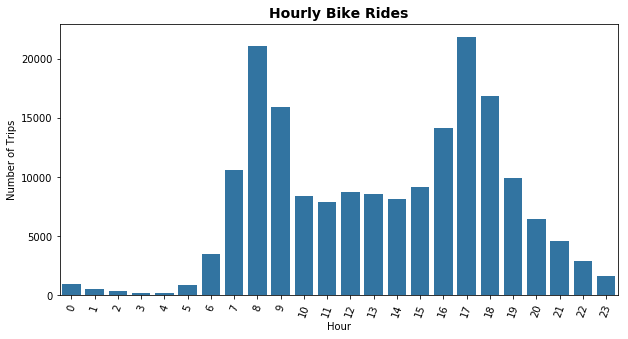

In [31]:
#when were most trips taken in terms of time of day?
plt.figure(figsize=[10,5]);
base_color= sb.color_palette()[0]
sb.countplot(data= bike_df, x='start_hour', color= base_color);
plt.xticks(rotation= 70);
plt.xlabel('Hour');
plt.ylabel('Number of Trips');
plt.title('Hourly Bike Rides', fontsize=14, fontweight='bold');



>Observations

1. Highest number of trips were taken around 5pm (17:00 to 17:59)
2. Second highest number of trips were taken around 8am (8:00 to 8:59)
3. The least number of trips were taken between 3 and 4am

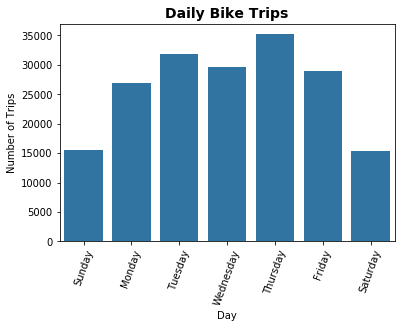

In [32]:
#when were most trips taken in terms of day of week?
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_of_week = pd.api.types.CategoricalDtype(ordered = True, categories = days)
bike_df['start_day']= bike_df['start_day'].astype(day_of_week)

sb.countplot(data=bike_df, x='start_day', color= base_color);
plt.xticks(rotation= 70);
plt.xlabel('Day');
plt.ylabel('Number of Trips');
plt.title('Daily Bike Trips', fontsize=14, fontweight='bold');

>Observations

1. Most bike trips were taken on a Tuesday, followed closely by a Thursday
2. The least number of bike trips were taken on a Sunday

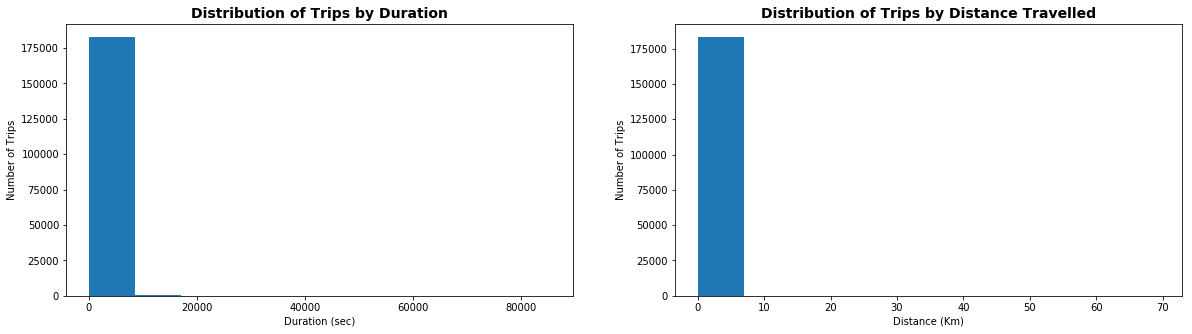

In [35]:
#what is the distribution of trip duration
plt.figure(figsize=[20,5]);

plt.subplot(1,2,1);
plt.hist(data= bike_df, x='duration_sec', color= base_color);
plt.xlabel('Duration (sec)');
plt.ylabel('Number of Trips');
plt.title('Distribution of Trips by Duration', fontsize=14, fontweight='bold');

#what is the distribution of distance travelled
plt.subplot(1,2,2);
plt.hist(data= bike_df, x='distance_km', color= base_color);
plt.xlabel('Distance (Km)');
plt.ylabel('Number of Trips');
plt.title('Distribution of Trips by Distance Travelled', fontsize=14, fontweight='bold');

>To make it more clear

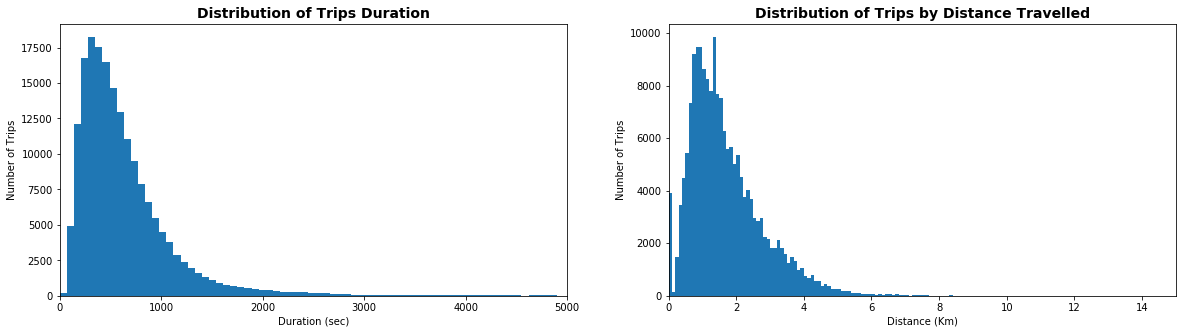

In [36]:
#what is the distribution of trip duration
plt.figure(figsize=[20,5]);
plt.subplot(1,2,1);
bins=np.arange(0, bike_df['duration_sec'].max()+70, 70)
plt.hist(data= bike_df, x='duration_sec', color= base_color, bins=bins);
plt.xlabel('Duration (sec)');
plt.ylabel('Number of Trips');
plt.title('Distribution of Trips Duration', fontsize=14, fontweight='bold');
plt.xlim(0, 5000)

#what is the distribution of distance travelled
plt.subplot(1,2,2);
bins=np.arange(0, bike_df['distance_km'].max()+0.1, 0.1)
plt.hist(data= bike_df, x='distance_km', color= base_color, bins=bins);
plt.xlabel('Distance (Km)');
plt.ylabel('Number of Trips');
plt.title('Distribution of Trips by Distance Travelled', fontsize=14, fontweight='bold');
plt.xlim(0, 15);

>Observations

1. Number of trips generally reduced with increasing duration
2. Number of trips generally reduced with increasing distance
3. Both distributions are right_skewed

In [37]:
#How long did the average trip take?
#remove outliers before exploring
query_df= bike_df.query('duration_sec <= 3500')
print(f"The average trip took {query_df.duration_sec.mean()} seconds")

#What was the average distance travelled?
#remove outliers before exploring
query2_df= bike_df.query('distance_km <= 9')
print(f"The average distance travelled was {query2_df.distance_km.mean()} kilometers")

The average trip took 622.3938035799825 seconds
The average distance travelled was 1.6891526894243205 kilometers


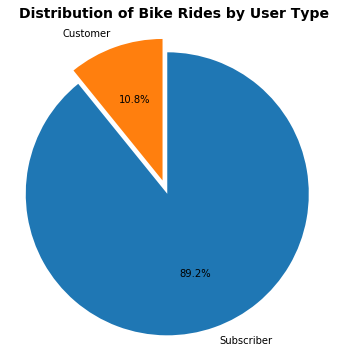

In [38]:
#What is the distribution of bike users by user type (piechart)
plt.figure(figsize=[6,6])
explode= (0.02, 0.08)
sorted_counts=bike_df['user_type'].value_counts()
plt.pie(sorted_counts, labels= sorted_counts.index, explode=explode, autopct='%1.1f%%', startangle=90, 
        shadow= False, counterclock= False);
plt.axis('square');
plt.title('Distribution of Bike Rides by User Type', fontsize=14, fontweight='bold');

>Observations

10.8% of bike rides were taken by customers, while 89.2% were taken by subscribers

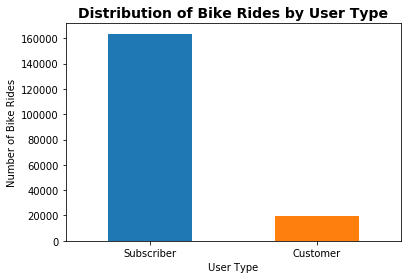

In [39]:
#What is the distribution of bike users by user type (barchart)
bike_df['user_type'].value_counts().plot(kind='bar')
plt.xlabel('User Type');
plt.ylabel('Number of Bike Rides');
plt.title('Distribution of Bike Rides by User Type', fontsize=14, fontweight='bold');
plt.xticks(rotation= 0);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In order to explore the time of day, month of year, and day of week most rides were taken, I had to extract the necessary information from the start_time column. Similarly, I used the provided latitude and longitude columns to get the distance of each trip in kilometers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had to adjust bin size and use the xlim function to make sense of the distribution of trip distance, and trip duration data. After applying bin and xlim, the data distribution became interpretable

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

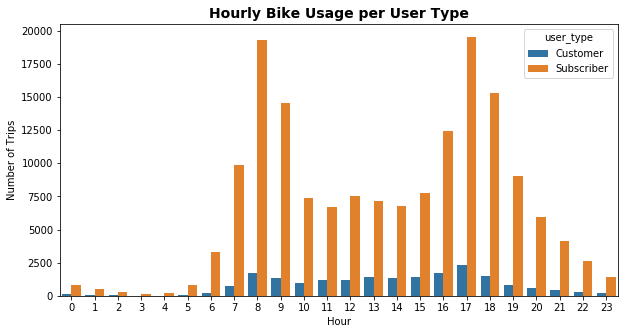

In [40]:
#what is the distribution of hourly bike usage per user type?
plt.figure(figsize=[10,5]);
sb.countplot(data = bike_df, x = 'start_hour', hue = 'user_type');
plt.xlabel('Hour');
plt.ylabel('Number of Trips');
plt.title('Hourly Bike Usage per User Type', fontsize=14, fontweight='bold');

>Observations:

1. Subscribers and customers had most of their trips around 8am and 5pm, lowest number of trips were recorded around 3 to 4am.
2. For customers, number of trips generally increased from 5am to 8am, and also increased from 10am to 5pm, then declined afterwards, however, for subscribers, number of trips increased drastically from 3am to 8am, and also increased from 2pm to 5pm, then declined drastically afterwards.

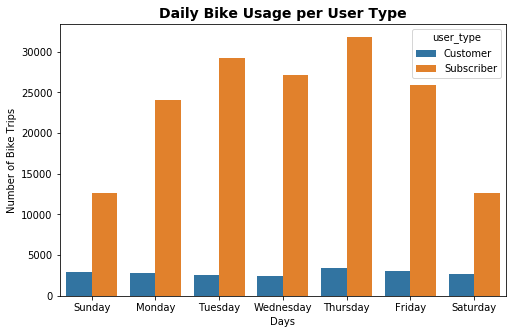

In [43]:
#what is the distribution of daily bike usage per user type?
plt.figure(figsize=[8,5]);
sb.countplot(data = bike_df, x = 'start_day', hue = 'user_type');
plt.xlabel('Days');
plt.ylabel('Number of Bike Trips');
plt.title('Daily Bike Usage per User Type', fontsize=14, fontweight='bold');

>Observations:

1. For subscribers, most bike trips were taken on a Tuesday, and the least number of bike trips were taken on a Sunday.
2. For customers, number of bike trips per day did not vary significantly, however, most bike trips were taken on a Friday.

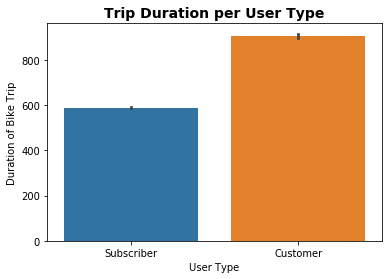

In [44]:
#what is the distribution of trip duration per user type?
sb.barplot(data=query_df, x='user_type', y='duration_sec');
plt.xlabel('User Type');
plt.ylabel('Duration of Bike Trip');
plt.title('Trip Duration per User Type', fontsize=14, fontweight='bold');

>Observations:

1. Subscribers generally had shorter bike trips than customers
2. Customers travelled for longer periods than subscribers

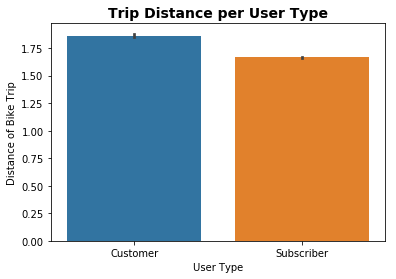

In [45]:
#what is the distribution of trip distance per user type?
sb.barplot(data=query2_df, x='user_type', y='distance_km');
plt.xlabel('User Type');
plt.ylabel('Distance of Bike Trip');
plt.title('Trip Distance per User Type', fontsize=14, fontweight='bold');

>Observations:

Difference between average distance travelled by subscribers and customers is not significant, however, customers travelled longer distance on average than subscribers

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


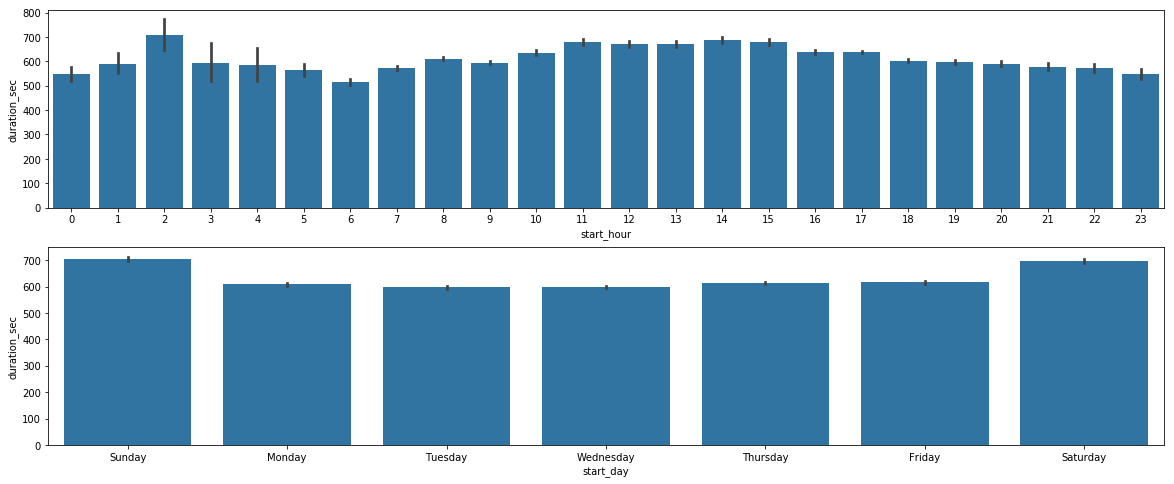

In [48]:
fig, ax = plt.subplots(nrows= 2, figsize= [20, 8])

#what is the distribution of time the trip started by trip duration
sb.barplot(data = query_df, x = 'start_hour', y = 'duration_sec', color = base_color, ax= ax[0]);

#what is the distribution of day of trip by trip duration
query_df['start_day']= query_df['start_day'].astype(day_of_week)
sb.barplot(data=query_df, x='start_day', y = 'duration_sec', color = base_color, ax = ax[1]);



>Observations:

1. Trips of the longest duration were taken at 2pm, while trips of the shortest duration were taken 6am
2. Trips of the longest duration were taken on a Saturday, followed closely by a Sunday
3. Trips of the longest duration were taken in July, while trips of the shortest duration were taken in February

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


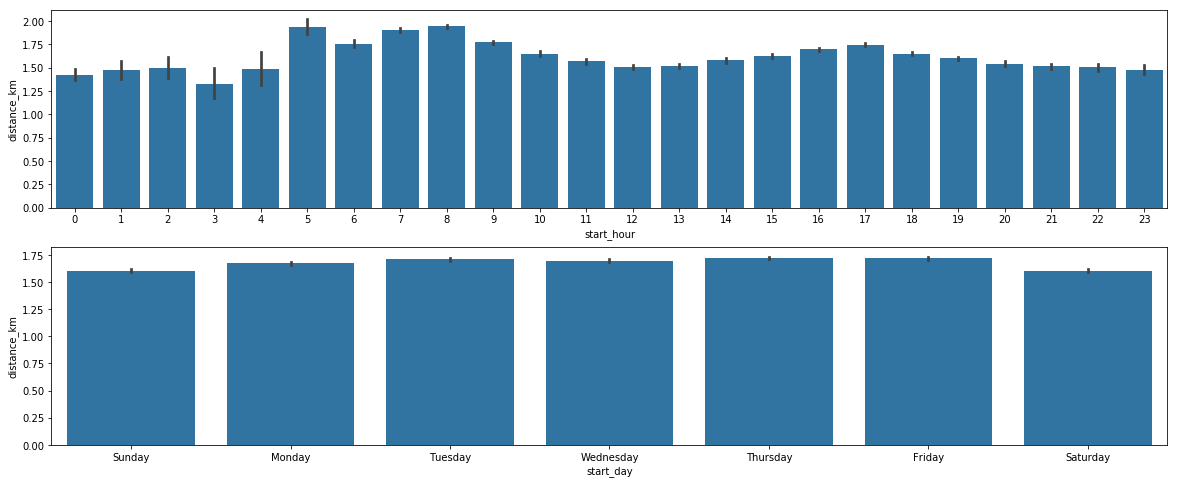

In [50]:
fig, ax = plt.subplots(nrows= 2, figsize= [20, 8])

#what is the distribution of time the trip started by distance covered
sb.barplot(data = query2_df, x = 'start_hour', y = 'distance_km', color = base_color, ax = ax[0]);

#what is the distribution of day of trip by distance covered
query2_df['start_day']= query2_df['start_day'].astype(day_of_week)
sb.barplot(data=query2_df, x='start_day', y = 'distance_km', color = base_color, ax = ax[1]);



>Observations:

1. Trips of the longest distance were taken at 8am, while trips of the shortest distance were taken at 1am
2. Overall distance travelled per day did not vary significantly, however, trips of the shortest distance were taken on a Sunday and Saturday
3. Trips of the longest distance were taken in March

In [51]:
#what is the average trip duration and distance covered by customers and subscribers?
sub_dist=query2_df.query('user_type == "Subscriber"')
cus_dist=query2_df.query('user_type == "Customer"')
sub_dur=query_df.query('user_type == "Subscriber"')
cus_dur=query_df.query('user_type == "Customer"')
print(f'The average trip duration of subscribers is: {sub_dur.duration_sec.mean()} seconds')
print(f'The average trip duration of customers is: {cus_dur.duration_sec.mean()} seconds')
print(f' The average distance covered by subscribers is: {sub_dist.distance_km.mean()} kilometers')
print(f' The average distance covered by customers is: {cus_dist.distance_km.mean()} kilometers')

The average trip duration of subscribers is: 589.3741914876628 seconds
The average trip duration of customers is: 907.9936244819892 seconds
 The average distance covered by subscribers is: 1.6679539607195473 kilometers
 The average distance covered by customers is: 1.8637038328097246 kilometers


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>Although subscribers generally had higher number of bike trips than customers, they travelled for shorter duration and shorter distances compared to customers.

>For both customers and subscribers, daily number of bike trips peaked at 8am and 5pm

>For subscribers number of daily trips are very high on weekdays, and very low during weekends. For customers however, number of bike trips did not vary significantly from day to day.

>Highest number of trips taken by subscribers was observed in March, while lowest number of trips was observed in December. For customers, highest number of trips was observed in December, while lowest number of trips was observed in February

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> it is interesting to see that eventhough most bike trips are taken on weekdays, weekend trips actually take longer duration

## Multivariate Exploration



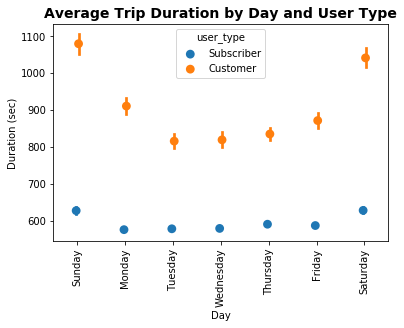

In [53]:
#day vs duration vs user_type
sb.pointplot(data=query_df, x='start_day', y='duration_sec', hue='user_type', linestyles='', dodge= True);
plt.xticks(rotation= 90);
plt.xlabel('Day');
plt.ylabel('Duration (sec)');
plt.title('Average Trip Duration by Day and User Type', fontweight='bold', fontsize=14);

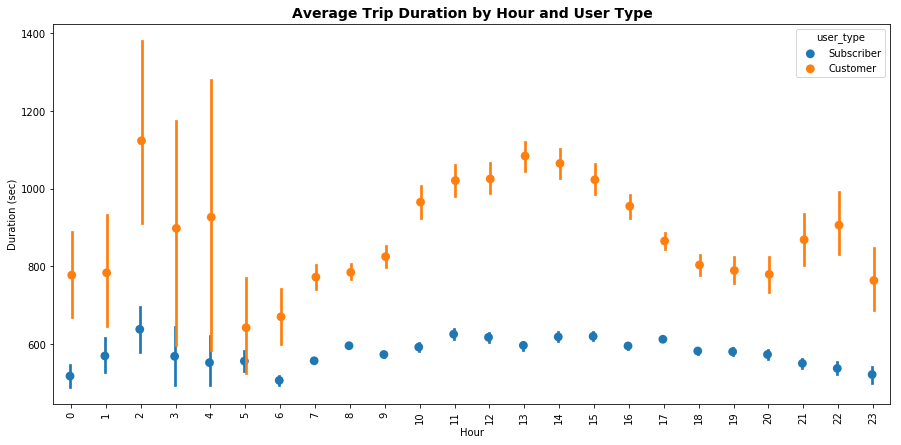

In [54]:
#hour vs duration vs user_type
plt.figure(figsize=[15,7]);
sb.pointplot(data=query_df, x='start_hour', y='duration_sec', hue='user_type', linestyles='', dodge= True);
plt.xticks(rotation= 90);
plt.xlabel('Hour');
plt.ylabel('Duration (sec)');
plt.title('Average Trip Duration by Hour and User Type', fontweight='bold', fontsize=14);

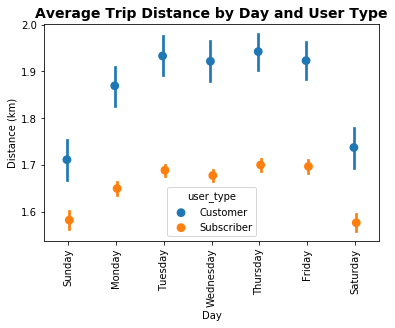

In [56]:
#day vs distance vs user_type
sb.pointplot(data=query2_df, x='start_day', y='distance_km', hue='user_type', linestyles='', dodge= True);
plt.xticks(rotation= 90);
plt.xlabel('Day');
plt.ylabel('Distance (km)');
plt.title('Average Trip Distance by Day and User Type', fontweight='bold', fontsize=14);

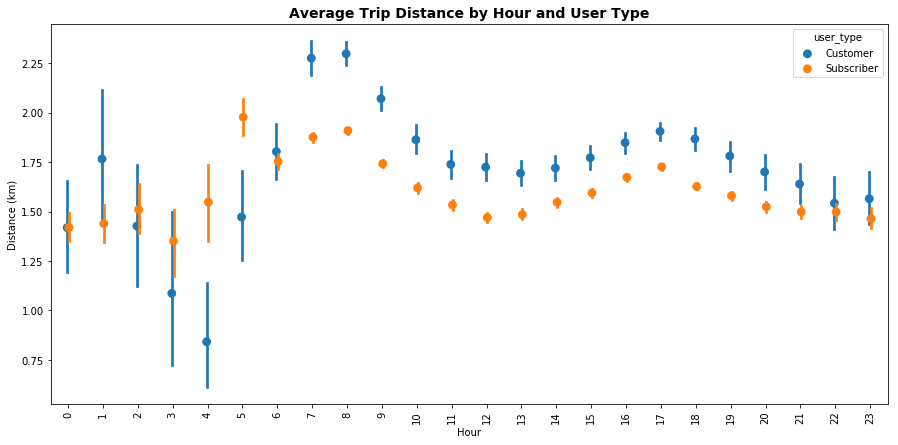

In [57]:
#hour vs distance vs user_type
plt.figure(figsize=[15,7]);
sb.pointplot(data=query2_df, x='start_hour', y='distance_km', hue='user_type', linestyles='', dodge= True);
plt.xticks(rotation= 90);
plt.xlabel('Hour');
plt.ylabel('Distance (km)');
plt.title('Average Trip Distance by Hour and User Type', fontweight='bold', fontsize=14);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Multivariate analysis of this dataset further strengthened many observations reported earlier. Customers generally travelled longer periods by hour, day, and month compared to subscribers. Similarly, customers generally travelled longer distance by month and day compared to subscribers. However, from midnight to 6am, distance travelled by subscribers were either higher than that travelled by customers, or almost equal to.

### Were there any interesting or surprising interactions between features?

> It is interesting to see that eventhough most bike trips were taken on weekdays, longest bike trips in terms of duration were actually taken on weekends.